In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype 
from sklearn import model_selection, metrics

import os
os.getcwd()

'D:\\NUS\\GitHub\\BT4222_GrpProject'

In [3]:
data = pd.read_csv("./Output/data_clean&processed_addedsentiment.csv")
#data = data.drop('Unnamed: 0', axis=1)

In [4]:
data.sample(3)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,current_currency,deadline,fx_rate,goal,...,num_faq_bool,avg_fund_per_backer,comments_afinn,blurb_name,faq_comments,story_afinn,faq_comments_afinn,blurb_name_afinn,blurb_afinn,name_afinn
502,2,BRiSK WORKS is removing barriers that stand in...,"{'id': 342, 'name': 'Web', 'slug': 'technology...",100,US,2020-03-09 14:42,USD,2020-12-02 16:13,1.0,82500,...,0,50.000000,-1.0,BRiSK WORKS is removing barriers that stand in...,[' ']No comments yet.,46.0,-1.0,8.0,6.0,2.0
591,7,Fading Echoes is in the process of recording t...,"{'id': 43, 'name': 'Rock', 'slug': 'music/rock...",631,US,2013-02-17 22:54,USD,2013-04-27 19:04,1.0,600,...,0,90.142857,-1.0,Fading Echoes is in the process of recording t...,[' ']No comments yet.,12.0,-1.0,3.0,2.0,1.0
527,203,Centuries old prophecies. Shadowy government c...,"{'id': 252, 'name': 'Graphic Novels', 'slug': ...",6762,US,2017-04-24 22:28,USD,2017-06-18 15:50,1.0,4850,...,0,33.310345,59.0,Centuries old prophecies. Shadowy government c...,[' ']The UnderwoodsSuperbacker\nover 3 years...,164.0,59.0,6.0,6.0,0.0


In [5]:
data.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'current_currency', 'deadline', 'fx_rate',
       'goal', 'id', 'launched_at', 'location', 'name', 'pledged', 'profile',
       'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'usd_type', 'story', 'faq', 'num_faq', 'comments', 'n_comments',
       'duration', 'parent_category', 'category_name', 'location_name',
       'month_launched', 'year_launched', 'backers_count_log', 'goal_log',
       'pledged_log', 'duration_log', 'n_comments_log', 'num_faq_bool',
       'avg_fund_per_backer', 'comments_afinn', 'blurb_name', 'faq_comments',
       'story_afinn', 'faq_comments_afinn', 'blurb_name_afinn', 'blurb_afinn',
       'name_afinn'],
      dtype='object')

In [6]:
data.isna().sum()

backers_count               0
blurb                       0
category                    0
converted_pledged_amount    0
country                     0
created_at                  0
current_currency            0
deadline                    0
fx_rate                     0
goal                        0
id                          0
launched_at                 0
location                    0
name                        0
pledged                     0
profile                     0
slug                        0
source_url                  0
spotlight                   0
staff_pick                  0
state                       0
state_changed_at            0
static_usd_rate             0
urls                        0
usd_pledged                 0
usd_type                    0
story                       0
faq                         0
num_faq                     0
comments                    0
n_comments                  0
duration                    0
parent_category             0
category_n

# SVM

In [7]:
from sklearn.svm import SVC

In [10]:
cols_to_drop = ['profile', 'category', 'created_at', 'location', 'current_currency', 'deadline', 'id', 
                'launched_at', 'slug', 'source_url', 'state_changed_at', 'urls', 'static_usd_rate', 
                'usd_pledged', 'converted_pledged_amount', 'spotlight', 'name_afinn', 'blurb_afinn','comments_afinn']

data_new = data.drop(cols_to_drop, axis=1)
data_new.columns

Index(['backers_count', 'blurb', 'country', 'fx_rate', 'goal', 'name',
       'pledged', 'staff_pick', 'state', 'usd_type', 'story', 'faq', 'num_faq',
       'comments', 'n_comments', 'duration', 'parent_category',
       'category_name', 'location_name', 'month_launched', 'year_launched',
       'backers_count_log', 'goal_log', 'pledged_log', 'duration_log',
       'n_comments_log', 'num_faq_bool', 'avg_fund_per_backer', 'blurb_name',
       'faq_comments', 'story_afinn', 'faq_comments_afinn',
       'blurb_name_afinn'],
      dtype='object')

In [11]:
#drop text features
text_to_drop = ['blurb','name','story','faq','comments','blurb_name','faq_comments']
data_new = data_new.drop(text_to_drop , axis=1)
data_new.columns

Index(['backers_count', 'country', 'fx_rate', 'goal', 'pledged', 'staff_pick',
       'state', 'usd_type', 'num_faq', 'n_comments', 'duration',
       'parent_category', 'category_name', 'location_name', 'month_launched',
       'year_launched', 'backers_count_log', 'goal_log', 'pledged_log',
       'duration_log', 'n_comments_log', 'num_faq_bool', 'avg_fund_per_backer',
       'story_afinn', 'faq_comments_afinn', 'blurb_name_afinn'],
      dtype='object')

In [10]:
#Looks at categorical variables

In [11]:
data_new.parent_category.value_counts()

Art                   192
Film & Video          144
Music                  83
Technology             83
Photography            71
Games                  66
Publishing             63
Fashion                60
No Parent Category     58
Journalism             44
Comics                 37
Food                   33
Theater                30
Dance                  18
Crafts                  3
Name: parent_category, dtype: int64

In [12]:
data_new.category_name.value_counts()

Illustration       56
Painting           56
World Music        53
Web                50
Apparel            48
                   ..
Embroidery          1
Social Practice     1
Periodicals         1
Small Batch         1
Video               1
Name: category_name, Length: 68, dtype: int64

In [13]:
series = pd.value_counts(data_new.category_name)
mask = series.lt(7)
series[mask].index

Index(['Television', 'Makerspaces', 'Comedy', 'Animals', 'Publishing',
       'Anthologies', 'Workshops', 'Audio', 'Space Exploration', 'Art Books',
       'Photo', 'Poetry', 'Stationery', 'Nonfiction', 'Video',
       'Camera Equipment', 'Residencies', 'Social Practice', 'Movie Theaters',
       'Periodicals', 'Small Batch', 'Romance', 'Embroidery'],
      dtype='object')

In [14]:
#group all the category_name with less than 7 count as others

data_new['category_name_grp'] = np.where(data_new['category_name'].isin(series[mask].index),'Other',data_new['category_name'])

In [15]:
data_new['category_name_grp'].value_counts()

Other               60
Illustration        56
Painting            56
World Music         53
Web                 50
Apparel             48
Documentary         47
Graphic Novels      37
Photobooks          35
Horror              34
Drama               32
Conceptual Art      28
Print               27
Tabletop Games      24
Dance               23
Drinks              23
Young Adult         20
Mixed Media         18
Plays               17
Rock                17
Journalism          17
Digital Art         16
Live Games          16
Action              14
Art                 14
Video Games         14
Metal               13
Spaces              13
Accessories         12
Fine Art            12
Places              12
Mobile Games        12
Performances        10
Gadgets             10
Installations       10
Software             9
Festivals            9
Calendars            9
Academic             8
DIY Electronics      8
3D Printing          7
People               7
Fiction              7
Ceramics   

In [16]:
data_new = data_new.drop(['category_name'] , axis=1)

In [17]:
data_new.location_name.value_counts()

New York                    50
London                      47
Los Angeles                 36
Chicago                     15
San Francisco               13
                            ..
Schwabenheim an der Selz     1
Lorton                       1
Caen                         1
Hobart                       1
Chandler                     1
Name: location_name, Length: 487, dtype: int64

In [18]:
#group all the location_name with less than 2 count as others

series = pd.value_counts(data_new.location_name)
mask = series.lt(2)
series[mask].index

data_new['location_name_grp'] = np.where(data_new['location_name'].isin(series[mask].index),'Other',data_new['location_name'])

data_new['location_name_grp'].value_counts()

Other          358
New York        50
London          47
Los Angeles     36
Chicago         15
              ... 
Canberra         2
Oakland          2
Ventura          2
Santa Cruz       2
Kingston         2
Name: location_name_grp, Length: 130, dtype: int64

In [19]:
#Too imbalance, cannot grp 
data_new = data_new.drop(['location_name_grp'] , axis=1)

In [20]:
data_new.columns

Index(['backers_count', 'country', 'fx_rate', 'goal', 'pledged', 'staff_pick',
       'state', 'usd_type', 'num_faq', 'n_comments', 'duration',
       'parent_category', 'location_name', 'month_launched', 'year_launched',
       'backers_count_log', 'goal_log', 'pledged_log', 'duration_log',
       'n_comments_log', 'num_faq_bool', 'avg_fund_per_backer', 'story_afinn',
       'faq_comments_afinn', 'blurb_name_afinn', 'category_name_grp'],
      dtype='object')

## One Hot Encoding

In [21]:
#Not using location name becos too many categories 
categorical_cols = ["country","staff_pick","usd_type","parent_category","num_faq_bool","category_name_grp"]

In [22]:
# Split dataset
X = data_new.drop(['state','backers_count','pledged','pledged_log','duration','n_comments','num_faq','goal','location_name'], axis=1)
y = data_new.state

# set stratify = y to maintain ratio of successful:failed for train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=2019, stratify = y)

In [23]:
X.columns

Index(['country', 'fx_rate', 'staff_pick', 'usd_type', 'parent_category',
       'month_launched', 'year_launched', 'backers_count_log', 'goal_log',
       'duration_log', 'n_comments_log', 'num_faq_bool', 'avg_fund_per_backer',
       'story_afinn', 'faq_comments_afinn', 'blurb_name_afinn',
       'category_name_grp'],
      dtype='object')

In [24]:
# One Hot Encoding with training set only
OHE_df = pd.DataFrame()

for i in categorical_cols:
    OHE_df[i] = X_train[i].astype(CategoricalDtype(list(set(X[i]))))
    
    OHE_df = pd.concat([OHE_df, pd.get_dummies(X[i], prefix=i)],axis=1)

In [25]:
OHE_df = OHE_df.drop(categorical_cols, axis= 1)

X_no_cat = X.drop(categorical_cols, axis= 1)
OHE_df = pd.concat([X_no_cat, OHE_df],axis=1)

OHE_train, OHE_test, y_train, y_test = model_selection.train_test_split(OHE_df, y, test_size=0.2, random_state=2019)
print(OHE_train.shape, OHE_test.shape)

(788, 100) (197, 100)


In [27]:
#https://towardsdatascience.com/a-guide-to-svm-parameter-tuning-8bfe6b8a452c

#https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

Text(0, 0.5, 'log(backers)')

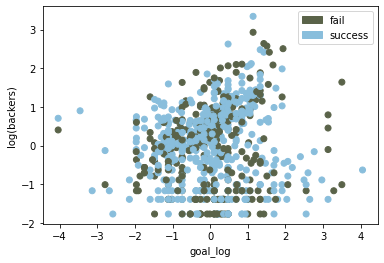

In [26]:
import matplotlib.patches as mpatches

#goal and backers
colormap = np.array(['#5a6349', '#89bedc'])

plt.scatter(X_train.goal_log, X_train.backers_count_log, c=colormap[y_train])

fail = mpatches.Patch(color='#5a6349', label='fail')
success = mpatches.Patch(color='#89bedc', label='success')

plt.legend(handles=[fail,success])

plt.xlabel("goal_log")
plt.ylabel("log(backers)")

C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log(fund per backer)')

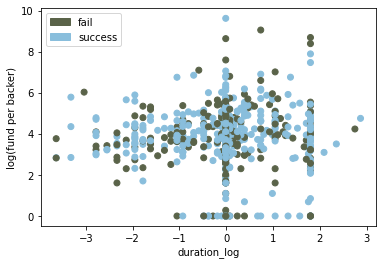

In [27]:
#duration and fund per backer
colormap = np.array(['#5a6349', '#89bedc'])

plt.scatter(X_train.duration_log, np.log(X_train.avg_fund_per_backer), c=colormap[y_train])

fail = mpatches.Patch(color='#5a6349', label='fail')
success = mpatches.Patch(color='#89bedc', label='success')

plt.legend(handles=[fail,success])

plt.xlabel("duration_log")
plt.ylabel("log(fund per backer)")


Text(0, 0.5, 'log(faq_comments_afinn)')

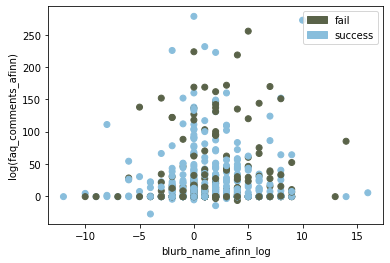

In [29]:
#blurb_name_afinn and faq_comments_afinn

colormap = np.array(['#5a6349', '#89bedc'])

plt.scatter(np.log(X_train.blurb_name_afinn), np.log(X_train.faq_comments_afinn), c=colormap[y_train])

fail = mpatches.Patch(color='#5a6349', label='fail')
success = mpatches.Patch(color='#89bedc', label='success')

plt.legend(handles=[fail,success])

plt.xlabel("blurb_name_afinn_log")
plt.ylabel("log(faq_comments_afinn)")

(3.0, 4.5)

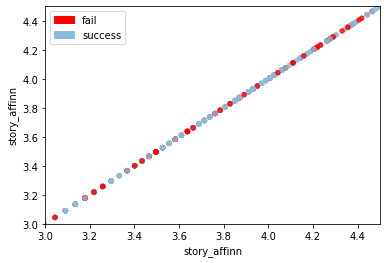

In [60]:
#story_affinn

colormap = np.array(['#FF0000', '#89bedc'])

plt.scatter(np.log(X_train.story_afinn), np.log(X_train.story_afinn), c=colormap[y_train], alpha=0.8, s=20)

fail = mpatches.Patch(color='#FF0000', label='fail')
success = mpatches.Patch(color='#89bedc', label='success')

plt.legend(handles=[fail,success])

plt.xlabel("story_affinn")
plt.ylabel("story_affinn")

plt.xlim(3,4.5)
plt.ylim(3,4.5)

In [30]:
### No clear relationship can be drawn with numerical features

### Running SVM

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
OHE_train.columns

Index(['fx_rate', 'month_launched', 'year_launched', 'backers_count_log',
       'goal_log', 'duration_log', 'n_comments_log', 'avg_fund_per_backer',
       'story_afinn', 'faq_comments_afinn', 'blurb_name_afinn', 'country_AT',
       'country_AU', 'country_BE', 'country_CA', 'country_CH', 'country_DE',
       'country_DK', 'country_ES', 'country_FR', 'country_GB', 'country_HK',
       'country_IE', 'country_IT', 'country_JP', 'country_LU', 'country_MX',
       'country_NL', 'country_NO', 'country_NZ', 'country_SE', 'country_SG',
       'country_US', 'staff_pick_False', 'staff_pick_True',
       'usd_type_domestic', 'usd_type_international', 'parent_category_Art',
       'parent_category_Comics', 'parent_category_Crafts',
       'parent_category_Dance', 'parent_category_Fashion',
       'parent_category_Film & Video', 'parent_category_Food',
       'parent_category_Games', 'parent_category_Journalism',
       'parent_category_Music', 'parent_category_No Parent Category',
       'parent

In [63]:
#Base model
model = SVC(kernel='linear', gamma="auto")

model.fit(OHE_train, y_train)
y_pred_train = model.predict(OHE_train)

print(" TRAIN ")
print(classification_report(y_train,y_pred_train))

 TRAIN 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       297
           1       0.97      0.98      0.98       491

    accuracy                           0.97       788
   macro avg       0.97      0.96      0.97       788
weighted avg       0.97      0.97      0.97       788



In [64]:
y_pred_test = model.predict(OHE_test)
print(" TEST ")
print(classification_report(y_test,y_pred_test))

 TEST 
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        70
           1       0.94      0.98      0.96       127

    accuracy                           0.94       197
   macro avg       0.95      0.93      0.94       197
weighted avg       0.94      0.94      0.94       197



### Look at features importance

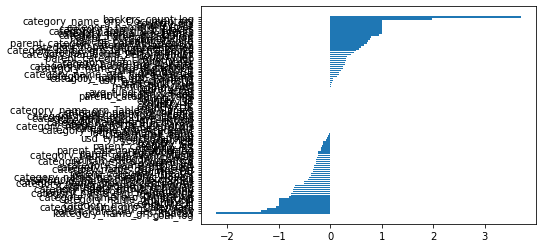

In [65]:
imp,names = zip(*sorted(zip(model.coef_[0], OHE_train.columns)))
plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)), names)
plt.show()

In [66]:
#Top 10 Factors that result in failed projects

coefs_with_fns = sorted(zip(model.coef_[0], OHE_train.columns)) 
df=pd.DataFrame(coefs_with_fns)
df.columns='coefficient','word'
df[df['coefficient']<0].sort_values(by='coefficient').head(10)

,coefficient,word
0,-2.217618,goal_log
1,-1.345527,category_name_grp_Spaces
2,-1.224119,parent_category_Technology
3,-1.065992,fx_rate
4,-1.000000,category_name_grp_Calendars
5,-1.000000,category_name_grp_Metal
6,-1.000000,country_CH
7,-1.000000,country_JP
8,-0.813800,category_name_grp_Action
9,-0.768720,category_name_grp_Digital Art


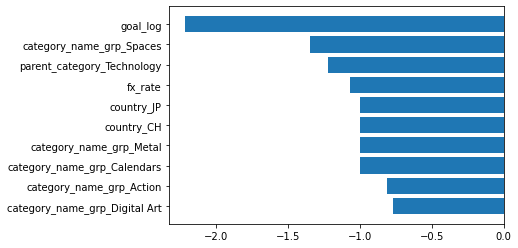

In [67]:
neg_features = df[df['coefficient']<0].sort_values(by='coefficient').head(10)
neg_features = neg_features.sort_values(by='coefficient', ascending=False)

plt.barh(range(len(neg_features)), neg_features["coefficient"], align='center')
plt.yticks(range(len(neg_features)), neg_features["word"])
plt.show()

In [68]:
#Top 10 Factors that result in success projects

df[df['coefficient']>0].sort_values(by='coefficient', ascending=False).head(10)

,coefficient,word
99,3.699238,backers_count_log
98,1.977649,category_name_grp_Documentary
94,1.000000,category_name_grp_Places
92,1.000000,category_name_grp_Drinks
93,1.000000,category_name_grp_Gadgets
91,1.000000,category_name_grp_Dance
95,1.000000,category_name_grp_Rock
96,1.000000,country_NO
97,1.000000,country_SG
90,0.939356,parent_category_Fashion


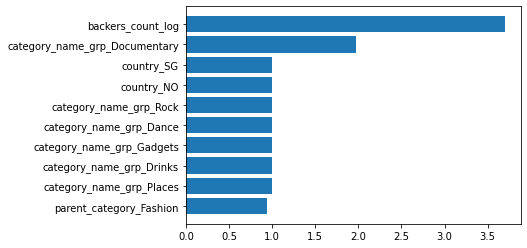

In [69]:
pos_features = df[df['coefficient']>0].sort_values(by='coefficient', ascending=False).head(10)
pos_features = pos_features.sort_values(by='coefficient')

plt.barh(range(len(pos_features)), pos_features["coefficient"], align='center')
plt.yticks(range(len(pos_features)), pos_features["word"])
plt.show()

In [40]:
## negative contributes to predict failed projects (goal_log, fx_rate, cat_name = space, parent_cat = Tech)
## positive contributes to predict success projects (backers count, docu, fashion, project from norway)

## Affinn score doesnt seems to have a strong impact on predictions

# Only works for linear kernel, cos for other higher dimensions kernel --> coef will not make sense (transform to another space, not input space)
    # Coef will not be related to weights 

### Hyper Params Tunning (non-linear kernel) --- In progress (slow)

In [41]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = RandomizedSearchCV(SVC(),param_grid,refit=True,verbose=2,n_iter=5,n_jobs=2)
grid.fit(OHE_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
['backers_count', 'country', 'fx_rate', 'goal', 'pledged', 'staff_pick',
       'state', 'usd_type', 'num_faq', 'n_comments', 'duration',
       'parent_category', 'location_name', 'month_launched', 'year_launched',
       'backers_count_log', 'goal_log', 'pledged_log', 'duration_log',
       'n_comments_log', 'num_faq_bool', 'avg_fund_per_backer',
       'comments_afinn', 'category_name_grp']